## Problem description
New DG Food Agro is a multinational exporter of various grains from India for nearly 130 years but their main product of exporting since the early 1980s has been Wheat. They export wheat to 207 countries. They started seeing varying exports of sales year on year for various countries. The reason that was theorized by them had a lot of natural causes like floods, country growth, population explosion etc. Now they need to decide which countries fall in the same range of export and which don’t. They also need to know which countries export is low and can be improved and which countries are performing very well across the years.
What they need is a repeatable solution which won’t get affected no matter how much data is added across time and that they should be able to explain the data across years in less number of variables.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 100)

### thousands=',' makes sure that the commas in the data don't make the entire column as string.

In [3]:
dataset = pd.read_csv('Project_Data_1.csv', thousands=',')
dataset.head()

,Sales of Wheat in tons,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
0,Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238
1,Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22
2,Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56
3,American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5
4,Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19


In [4]:
dataset.describe()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,196.966184,196.468599,192.811594,191.173913,188.724638,187.942029,178.898551,180.975845,178.120773,180.473430,177.521739,177.797101,179.516908,176.405797,173.922705,171.183575,169.019324,167.256039
std,232.385067,229.329664,224.805522,220.093799,216.750218,212.477587,193.786752,192.272421,188.843079,195.062942,199.438504,205.102644,205.321624,210.272545,210.486938,211.218437,211.057714,212.246576
min,0.000000,3.000000,3.000000,3.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,40.000000,37.500000,37.000000,34.000000,32.500000,31.500000,29.500000,29.000000,28.000000,21.500000,22.500000,24.500000,20.500000,21.000000,19.500000,18.000000,19.000000
50%,96.000000,93.000000,91.000000,88.000000,89.000000,92.000000,88.000000,93.000000,90.000000,90.000000,85.000000,80.000000,79.000000,71.000000,71.000000,66.000000,65.000000,65.000000
75%,290.000000,315.500000,320.000000,316.500000,314.000000,310.500000,306.500000,320.500000,323.000000,345.500000,319.500000,309.000000,306.000000,297.500000,287.500000,282.500000,277.500000,278.000000
max,1485.000000,1477.000000,1463.000000,1442.000000,1414.000000,1381.000000,910.000000,853.000000,777.000000,770.000000,761.000000,832.000000,932.000000,960.000000,1034.000000,1046.000000,1093.000000,1104.000000


### 207 data points and 207 countries in the dataset, this means there is no duplicate data

In [5]:
dataset['Sales of Wheat in tons'].nunique()

207

### Set the country name as index of the dataframe

In [6]:
dataset.set_index(['Sales of Wheat in tons'], inplace=True)

In [7]:
dataset.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
Sales of Wheat in tons,,,,,,,,,,,,,,,,,,
Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238
Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22
Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56
American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5
Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19


In [8]:
import plotly as py #For World Map
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

### Let us see the total wheat sales across all the countries for all the years
#### Looks like, overall, the sales are very good across African, South Asian and Asia pacific countries.
#### Moderate sales in south american countries
#### Sales are not looking so good among other countries like USA, Canada, Australia

In [9]:
data = dict(type = 'choropleth',            
            locations = dataset.index.tolist(),
           locationmode = 'country names',
            # This sums up the all the columns for all the countries, so we have sales for every country added from 1990 to 2007
           z = dataset.sum(axis=1), 
           text = dataset.index.tolist(),
           colorbar = {'title':'Total sales of wheat in tons from 1990-2007'})
layout = dict(title = 'Sales of Wheat from 1990-2007 cross all the countries', geo = dict(showframe = False, 
                       projection = {'type': 'equirectangular'}))

choromap3 = go.Figure(data = data, layout=layout)
iplot(choromap3)

#### Let's take a look at the data for 1990, then 2000 and then 2007 and see if we can find a pattern.

In [10]:
data = dict(type = 'choropleth',            
            locations = dataset.index.tolist(),
           locationmode = 'country names',
           z = dataset['1990'], 
           text = dataset.index.tolist(),
           colorbar = {'title':'Sales of Wheat in tons in 1990'})
layout = dict(title = 'Sales of Wheat in 1990', geo = dict(showframe = False, 
                       projection = {'type': 'equirectangular'}))

choromap3 = go.Figure(data = data, layout=layout)
iplot(choromap3)

In [11]:
data = dict(type = 'choropleth',            
            locations = dataset.index.tolist(),
           locationmode = 'country names',
           z = dataset['2000'], 
           text = dataset.index.tolist(),
           colorbar = {'title':'Sales of Wheat in tons in 2000'})
layout = dict(title = 'Sales of Wheat in 2000', geo = dict(showframe = False, 
                       projection = {'type': 'equirectangular'}))

choromap3 = go.Figure(data = data, layout=layout)
iplot(choromap3)

In [12]:
data = dict(type = 'choropleth',            
            locations = dataset.index.tolist(),
           locationmode = 'country names',
           z = dataset['2007'], 
           text = dataset.index.tolist(),
           colorbar = {'title':'Sales of Wheat in tons in 2007'})
layout = dict(title = 'Sales of Wheat in 2007', geo = dict(showframe = False, 
                       projection = {'type': 'equirectangular'}))

choromap3 = go.Figure(data = data, layout=layout)
iplot(choromap3)

In [13]:
# Apply scaling to the data to bring it down to same scale for clustering
X = dataset.values
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [14]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

wcss

[3725.9999999999995,
 1010.5569417191939,
 634.4672042120467,
 510.79296265462375,
 412.8085744441388,
 317.2158261270883,
 269.8311374405719,
 227.4896823183881,
 201.5431872218747,
 177.18353336994568]

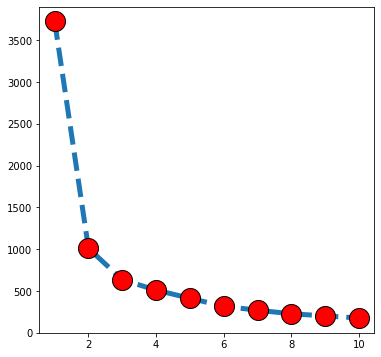

In [15]:
plt.figure(figsize=(6,6))
wcss_plot = plt.plot(range(1, 11), wcss, marker='o', markersize=20, markeredgecolor ='k', markerfacecolor='r', linestyle='--', linewidth=5)
#Looks like 6 clusters is a good choice.

In [16]:
kmeans = KMeans(n_clusters=6, init='k-means++')
y_kmeans = kmeans.fit_predict(X)

In [17]:
pd.DataFrame(kmeans.cluster_centers_)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.286970,-0.276204,-0.301217,-0.288365,-0.283984,-0.300533,-0.283360,-0.261178,-0.276139,-0.275107,-0.325306,-0.337512,-0.284325,-0.340029,-0.344430,-0.341438,-0.336833,-0.348250
1,0.271258,0.360316,0.421331,0.486771,0.556248,0.636939,0.807485,0.921102,1.016683,1.183900,1.230061,1.397574,1.527807,1.663032,1.665305,1.654978,1.618547,1.635284
2,2.238635,2.213228,2.200947,2.179918,2.152726,2.137746,2.273462,2.280886,2.234128,2.173068,2.187475,2.191537,1.966962,1.910691,1.878026,1.899709,1.892120,1.863716
3,1.067770,1.043520,1.040547,1.030354,1.019806,1.003118,1.033020,0.961333,0.955019,0.893976,0.869932,0.727915,0.667153,0.629728,0.590271,0.558197,0.550695,0.536259
4,5.556107,5.597338,5.663863,5.696927,5.666641,5.628595,2.799021,2.544344,2.759643,2.674975,2.932697,2.918786,3.673784,3.735599,4.096037,4.151802,4.388471,4.424170
5,-0.684016,-0.697775,-0.695167,-0.710148,-0.719533,-0.719785,-0.767838,-0.779789,-0.785152,-0.791351,-0.771194,-0.755002,-0.764095,-0.742275,-0.725925,-0.718912,-0.712312,-0.700669


In [18]:
# Adding the cluster number for every country to a new dataframe
dataset_cluster = pd.concat([dataset, pd.Series(kmeans.labels_, index=dataset.index)], axis=1)
dataset_cluster.rename(columns={0:'cluster_number'}, inplace=True)
dataset_cluster.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,cluster_number
Sales of Wheat in tons,,,,,,,,,,,,,,,,,,,
Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238,3
Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22,5
Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56,5
American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5,5
Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19,5


### Applying k fold grid search to find the best hyper parameters. This is also called hyper parameter tuning.

In [19]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_clusters': range(1,7),
              'init': ['k-means++', 'random'],
              'n_init': range(10,31),
             'algorithm': ['auto','full','elkan']}
kmeans_5fold = KMeans()

clf = GridSearchCV(kmeans_5fold, parameters, cv=10)
clf.fit(X)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_clusters': range(1, 7), 'init': ['k-means++', 'random'], 'n_init': range(10, 31), 'algorithm': ['auto', 'full', 'elkan']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

### Best parameters given by Grid Search

In [20]:
clf.best_params_

{'algorithm': 'full', 'init': 'random', 'n_clusters': 6, 'n_init': 14}

In [21]:
# Create a new k means model using these parameters.
kmeans = KMeans(n_clusters=6, init='random', algorithm='full', n_init=14)
y_kmeans = kmeans.fit_predict(X)

In [22]:
dataset_cluster = pd.concat([dataset, pd.Series(kmeans.labels_, index=dataset.index)], axis=1)
dataset_cluster.rename(columns={0:'cluster_number'}, inplace=True)
dataset_cluster.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,cluster_number
Sales of Wheat in tons,,,,,,,,,,,,,,,,,,,
Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238,0
Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22,1
Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56,1
American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5,1
Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19,1


In [23]:
# Let us see which countries belong to same clusters
data = dict(type = 'choropleth',            
            locations = dataset.index.tolist(),
           locationmode = 'country names',
           z = dataset_cluster.cluster_number, 
           text = dataset.index.tolist(),
           colorbar = {'title':'Cluster Group'})
layout = dict(title = 'Clustering of countries based on K-Means', geo = dict(showframe = False, 
                       projection = {'type': 'equirectangular'}))

choromap3 = go.Figure(data = data, layout=layout)
iplot(choromap3)

### Let us see if the clusters in the map above matches with the data across all the years from 1990 to 2007

In [24]:
data = dict(type = 'choropleth',            
            locations = dataset.index.tolist(),
           locationmode = 'country names',
           z = dataset.sum(axis=1), 
           text = dataset.index.tolist(),
           colorbar = {'title':'Sales of Wheat in tons from 1990-2007'})
layout = dict(title = 'Sales of Wheat from 1990-2007', geo = dict(showframe = False, 
                       projection = {'type': 'equirectangular'}))

choromap3 = go.Figure(data = data, layout=layout)
iplot(choromap3)

### PCA

In [25]:
from sklearn.decomposition import PCA
for components in range(1,18):
    pca = PCA(n_components=components)
    pca.fit_transform(X)
    print(f'Percentage of variance explained using {components} components = {sum(pca.explained_variance_ratio_)*100} %')

Percentage of variance explained using 1 components = 92.03977111052274 %
Percentage of variance explained using 2 components = 97.74467406727501 %
Percentage of variance explained using 3 components = 98.90913377645849 %
Percentage of variance explained using 4 components = 99.16258183766939 %
Percentage of variance explained using 5 components = 99.39246980712781 %
Percentage of variance explained using 6 components = 99.55243535612756 %
Percentage of variance explained using 7 components = 99.67510390199364 %
Percentage of variance explained using 8 components = 99.76397779811153 %
Percentage of variance explained using 9 components = 99.82947975265735 %
Percentage of variance explained using 10 components = 99.87721586886802 %
Percentage of variance explained using 11 components = 99.91009570535113 %
Percentage of variance explained using 12 components = 99.93752202132914 %
Percentage of variance explained using 13 components = 99.9614079137127 %
Percentage of variance explained us

In [26]:
# Let us choose 2 components as it gives us 97% of the variance.
pca = PCA(n_components=2)
X_transform = pca.fit_transform(X)

### Best hyper parameter search for data with PCA done.

In [27]:
parameters = {'n_clusters': range(1,7),
              'init': ['k-means++', 'random'],
              'n_init': range(10,31),
             'algorithm': ['auto','full','elkan']}
kmeans_kfold = KMeans()

clf = GridSearchCV(kmeans_kfold, parameters, cv=10)
clf.fit(X_transform)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_clusters': range(1, 7), 'init': ['k-means++', 'random'], 'n_init': range(10, 31), 'algorithm': ['auto', 'full', 'elkan']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [28]:
clf.best_params_

{'algorithm': 'auto', 'init': 'random', 'n_clusters': 6, 'n_init': 27}

In [29]:
# New k means model trained with these hyper parameters.
kmeans = KMeans(n_clusters=6, init='random', algorithm='auto', n_init=27)
y_kmeans = kmeans.fit_predict(X_transform)

In [30]:
dataset_cluster = pd.concat([dataset, pd.Series(kmeans.labels_, index=dataset.index)], axis=1)
dataset_cluster.rename(columns={0:'cluster_number'}, inplace=True)
dataset_cluster.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,cluster_number
Sales of Wheat in tons,,,,,,,,,,,,,,,,,,,
Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238,5
Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22,0
Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56,0
American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5,0
Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19,0


In [31]:
data = dict(type = 'choropleth',            
            locations = dataset.index.tolist(),
           locationmode = 'country names',
           z = dataset_cluster.cluster_number, 
           text = dataset.index.tolist(),
           colorbar = {'title':'Cluster Group'})
layout = dict(title = 'Clustering of countries based on K-Means', geo = dict(showframe = False, 
                       projection = {'type': 'equirectangular'}))

choromap3 = go.Figure(data = data, layout=layout)
iplot(choromap3)

In [32]:
data = dict(type = 'choropleth',            
            locations = dataset.index.tolist(),
           locationmode = 'country names',
           z = dataset.sum(axis=1), 
           text = dataset.index.tolist(),
           colorbar = {'title':'Sales of Wheat in tons from 1990-2007'})
layout = dict(title = 'Sales of Wheat from 1990-2007', geo = dict(showframe = False, 
                       projection = {'type': 'equirectangular'}))

choromap3 = go.Figure(data = data, layout=layout)
iplot(choromap3)

### Agglomerative Clustering

In [33]:
agg_model = AgglomerativeClustering(n_clusters=6, affinity = 'euclidean', linkage = 'ward')
y_kmeans = agg_model.fit_predict(X_transform)

In [34]:
dataset_cluster = pd.concat([dataset, pd.Series(kmeans.labels_, index=dataset.index)], axis=1)
dataset_cluster.rename(columns={0:'cluster_number'}, inplace=True)
dataset_cluster.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,cluster_number
Sales of Wheat in tons,,,,,,,,,,,,,,,,,,,
Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238,5
Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22,0
Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56,0
American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5,0
Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19,0


In [35]:
data = dict(type = 'choropleth',            
            locations = dataset.index.tolist(),
           locationmode = 'country names',
           z = dataset_cluster.cluster_number, 
           text = dataset.index.tolist(),
           colorbar = {'title':'Cluster Group'})
layout = dict(title = 'Clustering of countries based on K-Means', geo = dict(showframe = False, 
                       projection = {'type': 'equirectangular'}))

choromap3 = go.Figure(data = data, layout=layout)
iplot(choromap3)